<a href="https://colab.research.google.com/github/malowana/Udacity-Project-1/blob/main/Udacity_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read file
df_listings = pd.read_csv('/content/drive/MyDrive/AI/UDACITY/listings.csv.gz',
                          compression='gzip')

Data Description

In [ ]:
df_listings.shape

(6809, 75)

In [ ]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,...,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88
2,20168,https://www.airbnb.com/rooms/20168,20221205143541,2022-12-05,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.18
3,27886,https://www.airbnb.com/rooms/27886,20221205143541,2022-12-05,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.83
4,28871,https://www.airbnb.com/rooms/28871,20221205143541,2022-12-05,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.97,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.03


In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6809 non-null   int64  
 1   listing_url                                   6809 non-null   object 
 2   scrape_id                                     6809 non-null   int64  
 3   last_scraped                                  6809 non-null   object 
 4   source                                        6809 non-null   object 
 5   name                                          6809 non-null   object 
 6   description                                   6801 non-null   object 
 7   neighborhood_overview                         4428 non-null   object 
 8   picture_url                                   6809 non-null   object 
 9   host_id                                       6809 non-null   i

In [ ]:
#change if there is some missing values
def check_missing(train):
	"""
	Checking, if in dataframe are missing values.

	Parameters:
    dataframe : Dataframe where are missing values

  Returns:
    tuple:Returning tuple (column name, number of missing values)
	"""
	for column in train.columns:
		missing = column, train[column].isnull().sum()
		if missing[1] == 0: continue
		print(missing)
  
check_missing(df_listings)

('description', 8)
('neighborhood_overview', 2381)
('host_location', 775)
('host_about', 2787)
('host_response_time', 2054)
('host_response_rate', 2054)
('host_acceptance_rate', 992)
('host_is_superhost', 4)
('host_neighbourhood', 3771)
('neighbourhood', 2381)
('neighbourhood_group_cleansed', 6809)
('bathrooms', 6809)
('bathrooms_text', 13)
('bedrooms', 286)
('beds', 91)
('calendar_updated', 6809)
('first_review', 648)
('last_review', 648)
('review_scores_rating', 648)
('review_scores_accuracy', 652)
('review_scores_cleanliness', 652)
('review_scores_checkin', 652)
('review_scores_communication', 652)
('review_scores_location', 652)
('review_scores_value', 652)
('license', 138)
('reviews_per_month', 648)


In [ ]:
#drop empty columns
df_listings = df_listings.drop(['neighbourhood_group_cleansed', 'bathrooms', 
                                'calendar_updated'], axis=1)

In [ ]:
#remove dollar sigh from price value and change to int
df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(
    ',', '').str.slice(stop=-3).astype(int)

<ipython-input-87-b6d12742790f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(


**Price vs property type**

In [ ]:
def group_function(groupby_var="property_type", agg_var="price", smallest=True):
  """
	Grouping function

	Parameters:
    argument1 (string): Groupby variable
    argument2 (string): Aggregate by variable
    argument3 (boolean): Choose sorting type - largest/smallest on top

  Returns:
    df:Returning groupped and aggregated dataframe
	"""
    if smallest:
      return df_listings.groupby(groupby_var)[agg_var].mean().nsmallest(3)
    else:
      return df_listings.groupby(groupby_var)[agg_var].mean().nlargest(3)

In [ ]:
#top 3 the most expensive by property type
group_function(smallest=False)

property_type
Tower                  698.5
Entire villa           501.8
Shared room in boat    500.0
Name: price, dtype: float64

In [ ]:
#top 3 the cheapest by property type
group_function()

property_type
Shared room in aparthotel    44.000000
Shared room in hostel        46.521739
Shared room in farm stay     50.000000
Name: price, dtype: float64

In [ ]:
df_listings[df_listings.property_type =="Tower"]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2859,28970533,https://www.airbnb.com/rooms/28970533,20221205143541,2022-12-05,city scrape,Unique stay at Amsterdam The Crane by YAYS,As if sleeping in a converted crane isn’t exce...,The KNSM Island is a former industrial harbour...,https://a0.muscache.com/pictures/22f86e64-0d34...,163282758,...,4.53,4.77,4.53,Exempt,t,1,1,0,0,0.69
4651,50884955,https://www.airbnb.com/rooms/50884955,20221205143541,2022-12-05,city scrape,3. Mystique; 5-star suite on top of the crane,<b>The space</b><br />The Mystique suite is 45...,Faralda Crane Hotel is a monumental landmark....,https://a0.muscache.com/pictures/prohost-api/H...,21831151,...,5.00,5.00,3.50,Exempt,t,3,1,2,0,0.28


**Better location, bigger price?**

In [ ]:
df_price_loc = df_listings.groupby("review_scores_location")["price"].mean(
              ).reset_index()
df_price_loc.columns = ['review_scores_location', 'mean_price']

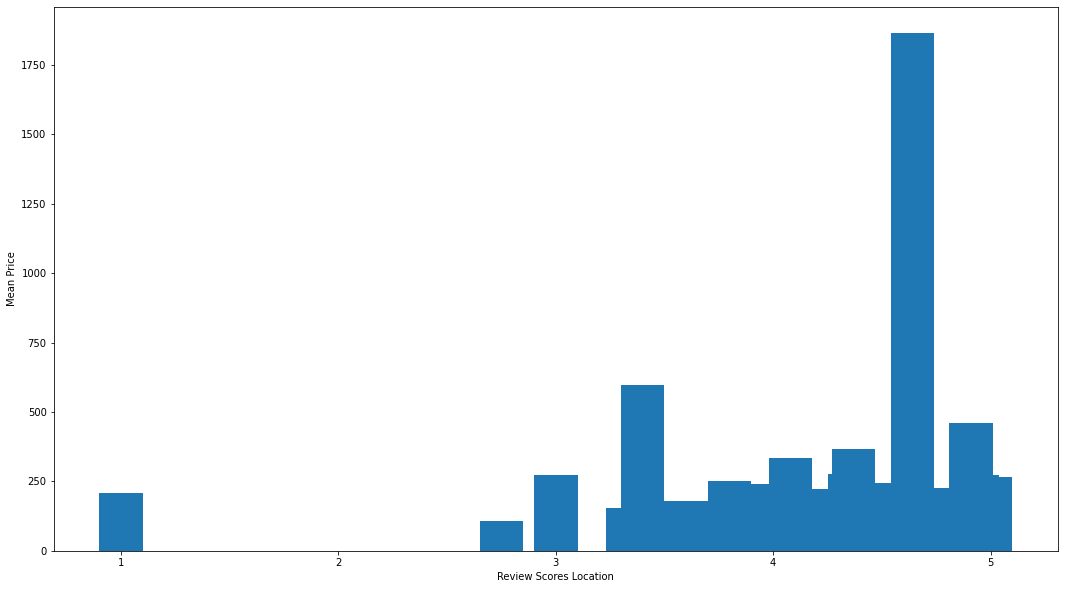

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(df_price_loc['review_scores_location'], df_price_loc['mean_price'],
       width=0.2)
plt.xlabel('Review Scores Location')
plt.ylabel('Mean Price')
plt.show()

In [ ]:
group_function(groupby_var="review_scores_location", smallest=True)

review_scores_location
4.12    65.0
4.28    66.5
4.16    84.0
Name: price, dtype: float64

In [ ]:
group_function(groupby_var="review_scores_location" , smallest=False)

review_scores_location
4.64    1865.071429
3.40     599.000000
4.91     459.627451
Name: price, dtype: float64

**Verified hosts**

In [ ]:
df_listings["host_identity_verified"] = df_listings["host_identity_verified"
                              ].replace('t', 'true').replace('f', 'false')

In [ ]:
df_pivoted = df_listings.pivot_table(values=["source"], index=["host_id", 
                  "host_identity_verified"], aggfunc=['count']).reset_index()

In [ ]:
df_verified = df_pivoted["host_identity_verified"].value_counts().reset_index()
df_verified.columns = ['host_identity_verified', 'sum']
df_verified

,host_identity_verified,sum
0,true,4868
1,false,905


In [ ]:
df_verified_perc = df_pivoted["host_identity_verified"].value_counts(
    normalize=True).reset_index()
df_verified_perc.columns = ['host_identity_verified', 'sum']
df_verified_perc

,host_identity_verified,sum
0,true,0.843236
1,false,0.156764


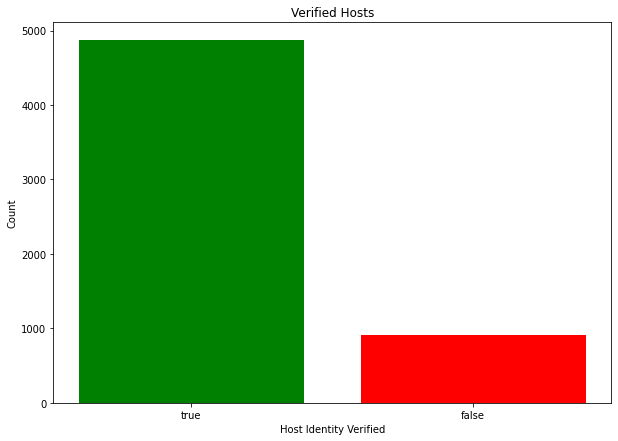

In [ ]:
# Create data
labels = df_verified["host_identity_verified"]
values = df_verified["sum"]

# Set colors for each label
colors = ["green" if label=="true" else "red" for label in labels]

fig = plt.figure(figsize=(10,7))
# Create bar plot
plt.bar(labels, values, color=colors)

# Set chart title and labels
plt.title("Verified Hosts")
plt.xlabel("Host Identity Verified")
plt.ylabel("Count")

# Show plot
plt.show()

In [ ]:
#mean prive for verified/non-verfied hosts
group_function(groupby_var="host_identity_verified")

host_identity_verified
false    204.955624
true     235.537158
Name: price, dtype: float64